In [11]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D


In [12]:
## If you are using the data by mounting the google drive, use the following :

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [13]:
# Defining the base path 
base_path  = '/content/drive/My Drive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/'

In [14]:

## Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
train_path = pathlib.Path(base_path + 'Train')  ## path_to_train_directory
test_path = pathlib.Path(base_path + 'Test')    ## path_to_test_directory

In [15]:
# Verify the path of train and test
print(train_path)
print(test_path)

/content/drive/My Drive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/drive/My Drive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [16]:
# Lets verify count of images
image_count_train = len(list(train_path.glob('*/*.jpg')))
print("Train image count: ", image_count_train)
image_count_test = len(list(test_path.glob('*/*.jpg')))
print("Test image count : ",image_count_test)






Train image count:  2239
Test image count :  118


Data Preparation



In [17]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.



2.1 Train Data Set Creation


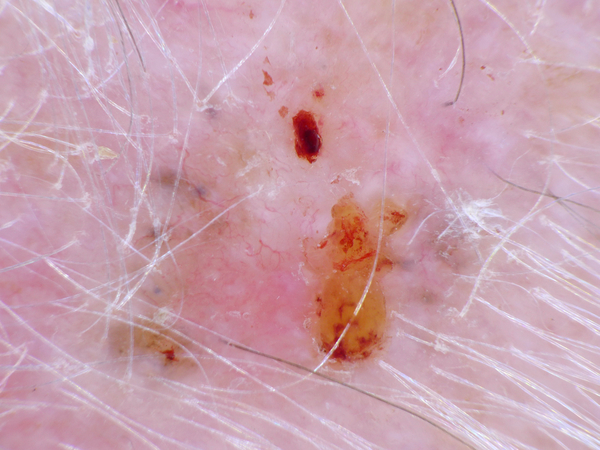

In [18]:
# Let's visualize one image first, to verify it is working or not.
basal_cell_carcinoma = list(train_path.glob('basal cell carcinoma/*'))
PIL.Image.open(str(basal_cell_carcinoma[1]))

In [19]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


2.2 Validation Data Set Creation


In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [21]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


3. Visualizing the data


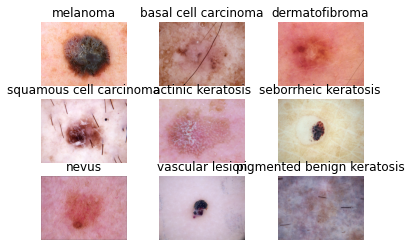

In [22]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

4- ## Model -0

In [24]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

4.2 Compiling the model

In [34]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

4.3 Training the model


In [35]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 493s 4s/step - loss: 3.9405 - accuracy: 0.2511 - val_loss: 1.9865 - val_accuracy: 0.2864
Epoch 2/20
56/56 [==============================] - 119s 2s/step - loss: 1.7901 - accuracy: 0.3711 - val_loss: 1.7792 - val_accuracy: 0.3468
Epoch 3/20
56/56 [==============================] - 125s 2s/step - loss: 1.6488 - accuracy: 0.4068 - val_loss: 1.5998 - val_accuracy: 0.4855
Epoch 4/20
56/56 [==============================] - 120s 2s/step - loss: 1.5706 - accuracy: 0.4565 - val_loss: 1.6276 - val_accuracy: 0.4922
Epoch 5/20
56/56 [==============================] - 128s 2s/step - loss: 1.4408 - accuracy: 0.5078 - val_loss: 1.4791 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 122s 2s/step - loss: 1.3844 - accuracy: 0.5179 - val_loss: 1.5329 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 124s 2s/step - loss: 1.3517 - accuracy: 0.5251 - val_loss: 1.3973 - val_accuracy: 0.5503
Epoch 8/20
56

In [36]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

4.4 Visualizing training results


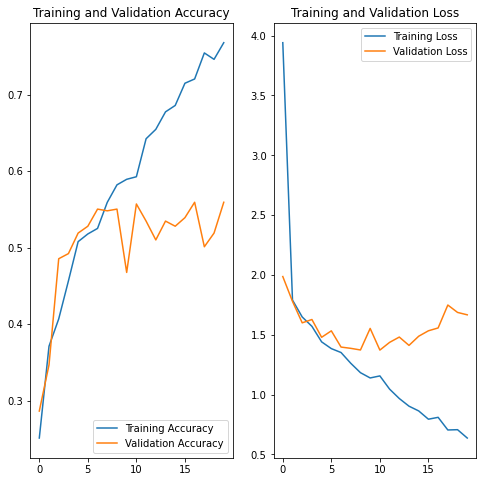

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

4.5 
Observations-

1-The accuracy of the model for the Training data set is at 77%. But the Validation accuracy is not in par with the training accuracy.
2-It is only at 56%. The validation loss as observed is very high.
3-This could also be indicative of some Overfit in the model.
4-We could add some Dropout layers and remove the BatchNormalization layers and
by adding a few more layers, we could improve the accuracy by trying to extract more features.


5. Model - 1

In [38]:
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

5.2 Compiling the model


In [39]:
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

5.3 Training the model


In [40]:
##Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 419s 7s/step - loss: 2.1352 - accuracy: 0.2015 - val_loss: 2.0353 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 396s 7s/step - loss: 2.0463 - accuracy: 0.1875 - val_loss: 2.0258 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 396s 7s/step - loss: 2.0284 - accuracy: 0.1936 - val_loss: 2.0207 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 397s 7s/step - loss: 2.0131 - accuracy: 0.2182 - val_loss: 2.0294 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 414s 7s/step - loss: 2.0326 - accuracy: 0.2020 - val_loss: 2.0233 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 414s 7s/step - loss: 2.0259 - accuracy: 0.1886 - val_loss: 2.0218 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 415s 7s/step - loss: 1.9926 - accuracy: 0.2316 - val_loss: 1.8961 - val_accuracy: 0.3244
Epoch 8/20
56

5.4 Visualizing the results


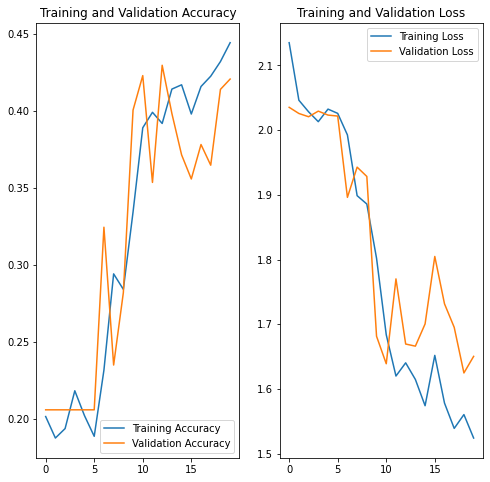

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

5.5 Observations
1-The model accuracy for Train data set has dropped to nearly 45%.
2-The accuracy for the Validation set is at 42%.
3-This is a much better model compared to the previous model as there seems to be No Overfit with the training accuracy 45% and validation accuracy at 42%.

6- Data Augmentation
6.1 Specifying the Augmentation

6.2 Visualizing the Augmented Data


In [ ]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

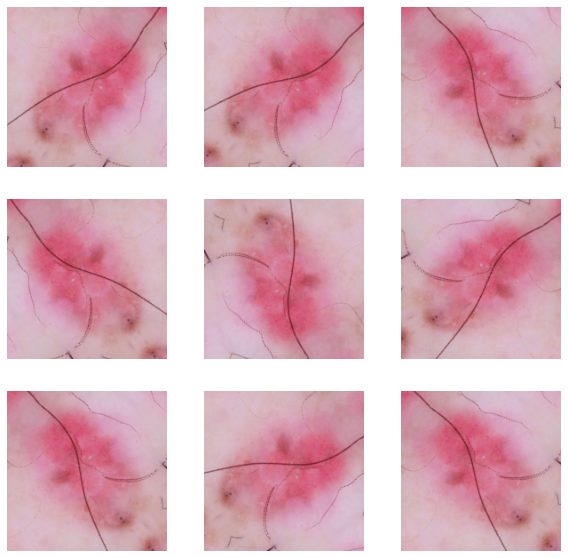

In [26]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

7. Model - 2
 7.1 - Creating the Model

In [27]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

7.2 Compiling the model


In [28]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

7.3 Training the model


In [29]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 544s 10s/step - loss: 2.1391 - accuracy: 0.1903 - val_loss: 2.0559 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 493s 9s/step - loss: 2.0358 - accuracy: 0.1931 - val_loss: 2.0238 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 466s 8s/step - loss: 2.0313 - accuracy: 0.1914 - val_loss: 2.0295 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 474s 8s/step - loss: 2.0310 - accuracy: 0.1869 - val_loss: 2.0264 - val_accuracy: 0.2058
Epoch 5/20
56/56 [==============================] - 473s 8s/step - loss: 2.0229 - accuracy: 0.2026 - val_loss: 2.0242 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 475s 9s/step - loss: 2.0294 - accuracy: 0.1892 - val_loss: 2.0224 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 475s 9s/step - loss: 2.0248 - accuracy: 0.1864 - val_loss: 2.0250 - val_accuracy: 0.2058
Epoch 8/20
56/56 [=====

7.4 Visualizing the results


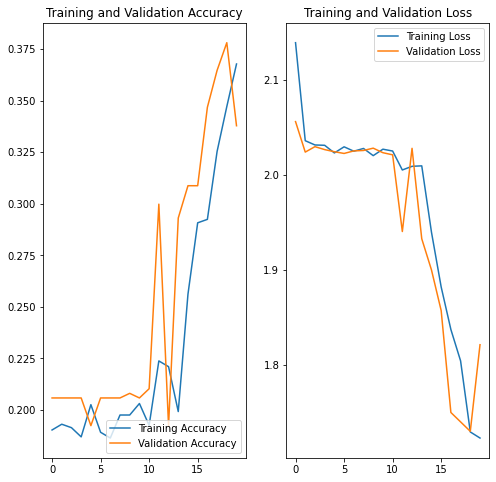

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

7.5 Observations
The model accuracy for Train data set has gone up to nearly 36%.
The accuracy for the Validation set is also at 33%.
This is a much better model compared to the previous two models as there seems to be No Overfit with the training accuracy 36 % and validation accuracy at 33%.
Data Augmentation has improved the model performance.

8. Checking for Class Imbalance


In [32]:
for i in class_names:
    directory =str(train_path)+"/"+i
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

TypeError: ignored

The samples of various classes are not in equal proportion.
There is a significant Class Imbalance observed.
The class with the least number of samples is Seborrheic Keratosis with 77.
The class that dominates the data in terms of proportionate number of samples is Pigmented Benign Keratosis with sample size of 462.

9. Using Augmentor for Class Imbalance Treatment

9.1 Installing Augmentor

In [33]:
!pip install Augmentor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

9.2 Using Augmentor


In [ ]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset)+"/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4F182A6400>: 100%|██████████| 500/500 [00:28<00:00, 17.56 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4FA78392E0>: 100%|██████████| 500/500 [00:32<00:00, 15.49 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4F19742E50>:  60%|██████    | 302/500 [00:16<00:09, 21.25 Samples/s]

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [35]:
image_count_train = len(list(train_path.glob('*/output/*.jpg')))
print(image_count_train)

0


In [37]:
path_list = [x for x in glob(os.path.join(train_path, '*','output', '*.jpg'))]


In [38]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_path, '*','output', '*.jpg'))]


In [39]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))


In [ ]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


9.3 Observations
The Augmentor has helped decrease the imbalance in class images and that can be viewed from above.
So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

10. Modelling Augmented Data


In [40]:
batch_size = 32
img_height = 180
img_width = 180

10.1 Creating the Train Data Set


In [41]:
data_dir_train=train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


10.2 Creating the Validation Data Set


In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


11. Model 3


11.1 Creating the Model


In [43]:
model_final=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

11.2 Compiling the Model


In [44]:
model_final.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

11.3 Training the Model


In [45]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model_final.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 174s 3s/step - loss: 2.7015 - accuracy: 0.2266 - val_loss: 2.0579 - val_accuracy: 0.2908
Epoch 2/30
56/56 [==============================] - 184s 3s/step - loss: 1.8307 - accuracy: 0.3214 - val_loss: 1.8134 - val_accuracy: 0.3736
Epoch 3/30
56/56 [==============================] - 172s 3s/step - loss: 1.6561 - accuracy: 0.4035 - val_loss: 1.5678 - val_accuracy: 0.4855
Epoch 4/30
56/56 [==============================] - 164s 3s/step - loss: 1.5253 - accuracy: 0.4688 - val_loss: 1.5982 - val_accuracy: 0.4541
Epoch 5/30
56/56 [==============================] - 163s 3s/step - loss: 1.4821 - accuracy: 0.4900 - val_loss: 1.5277 - val_accuracy: 0.4519
Epoch 6/30
56/56 [==============================] - 171s 3s/step - loss: 1.3822 - accuracy: 0.5095 - val_loss: 1.4541 - val_accuracy: 0.5056
Epoch 7/30
56/56 [==============================] - 164s 3s/step - loss: 1.3268 - accuracy: 0.5167 - val_loss: 1.4998 - val_accuracy: 0.4877
Epoch 8/30
56

11.4 Visualizing the model results


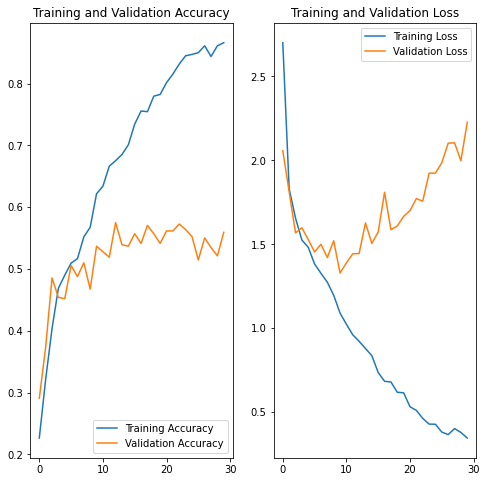

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

11.5 Observations


The training accuracy seems to be nearly ~86 %.
The validation accuracy is nearly ~56%.
Though the model accuracy has not improved, the class rebalance has helped treat the overfitting to some extent.
Much better models could be built or tried out using more epochs and more layers.